In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [33]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_original.csv', header=1)
dataset.head()




,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Dataset Attributes

## Features

1. **Date**
2. **Temperature**
3. **Relative Humidity (RH)**: 21% to 90%
4. **Wind Speed (WS)**: 6 km/h to 29 km/h
5. **Rain**
6. **Fine Fuel Moisture Code (FFMC)**: 28.9 to 92.5
7. **Duff Moisture Code (DMC)**: 1.1 to 65.9
8. **Drought Code (DC)**: 7 to 220.4
9. **Initial Spread Index (ISI)**: 0 to 18.5
10. **Build Up Index (BUI)**: 0 to 68

## Target Variable
 **Fire Weather Index (FWI)**: 0 to 31.1





In [34]:
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
dtypes: str(14)
memory usage: 27.0 KB


# Data cleaning process

In [35]:
#Checking for null values
print(dataset.isnull().sum()) 
dataset[dataset.isnull().any(axis=1)]


day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [36]:

df=dataset


## making to seperate dataset for each region 
Dividing the dataset into two regions 
1. Bejaia Region Dataset 
2. Sidi-Bel Abbes Region Dataset


In [37]:
#setting the label for both seperate dataset 
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=0


df.info()



<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    str    
 1   month        245 non-null    str    
 2   year         245 non-null    str    
 3   Temperature  245 non-null    str    
 4    RH          245 non-null    str    
 5    Ws          245 non-null    str    
 6   Rain         245 non-null    str    
 7   FFMC         245 non-null    str    
 8   DMC          245 non-null    str    
 9   DC           245 non-null    str    
 10  ISI          245 non-null    str    
 11  BUI          245 non-null    str    
 12  FWI          245 non-null    str    
 13  Classes      244 non-null    str    
 14  Region       246 non-null    float64
dtypes: float64(1), str(14)
memory usage: 29.0 KB


In [38]:
#changing the dtype of region
df.head()
df["Region"]=df["Region"].astype(int)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
 14  Region       246 non-null    int64
dtypes: int64(1), str(14)
memory usage: 29.0 KB


In [39]:
#removing null values

df=df.dropna().reset_index(drop=True)
print(df.isnull().sum())  # all null values are cleared
print(df.iloc[[121,122,123,124]])

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64
     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC   DC  ISI  BUI  \
121   30     09  2012           25   78   14    1.4    45  1.9  7.5  0.2  2.4   
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC   DC  ISI  BUI   
123   01     06  2012           32   71   12    0.7  57.1  2.5  8.2  0.6  2.8   
124   02     06  2012           30   73   13      4  55.7  2.7  7.8  0.6  2.9   

     FWI    Classes    Region  
121  0.1  not fire          0  
122  FWI    Classes         0  
123  0.2  not fire          0  
124  0.2  not fire          0  


#### removing 122 index -columns get repeated 

In [40]:
df=df.drop(122).reset_index(drop=True)


In [41]:
#adjusting columns names -removing spaces
df.columns=df.columns.str.strip()
print(df.columns)


df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
print(df.info())

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='str')
<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    str    
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), str(1)

### Data Analysis

In [42]:
df_copy=df 

#droping columns (not required)
df_copy=df_copy.drop(['day', 'month', 'year'],axis=1)
df_copy.head()

#encoding the catogeries of column
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()
print(df_copy['Classes'].value_counts())



Classes
1    137
0    106
Name: count, dtype: int64


#### observation 



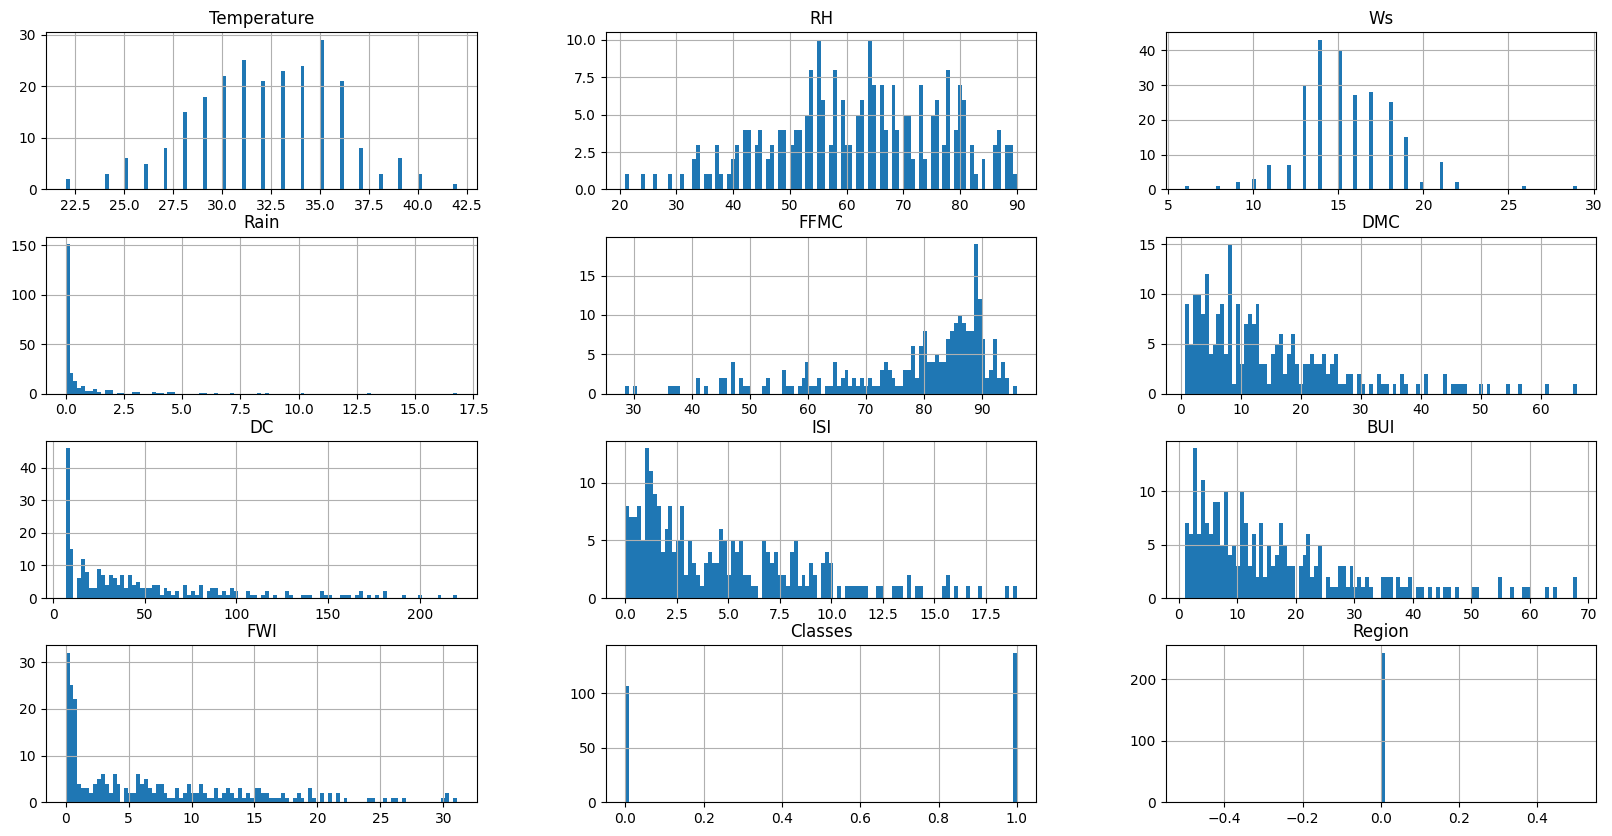

In [56]:
#ploting density plot for all the features 
df_copy.hist(bins=100,figsize=(20,10))
plt.show()

<Axes: ylabel='FWI'>

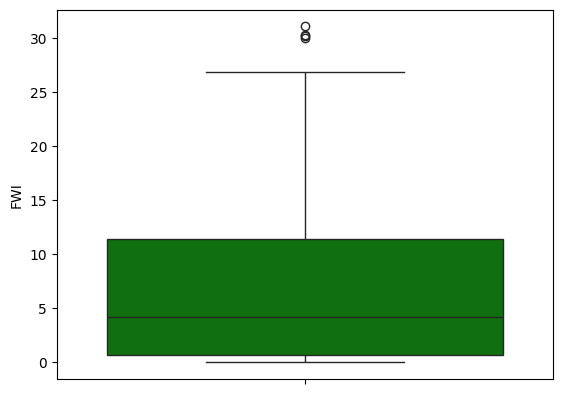

In [67]:
#corellation
df_copy.corr()

#FWI has +ve corelation with FFMC,DMC,DC,ISI,BUI and somewhat with temp and WS
#FWI has -ve corelation with RH and Rain

sns.boxplot(df_copy['FWI'],color="green")

In [ ]:
#month vs fire relation graph rmaining